In [1]:
from datetime import datetime
import re
import pandas as pd
import requests 
from bs4 import BeautifulSoup as bs
%matplotlib inline

url = 'http://www.nairaland.com/home' # Nairaland url
responce = requests.get(url)
row_data = responce.text
soup_data = bs(row_data, 'lxml')   #passing the row_data to beautifulsoup
member_found = None 

re_match = "[\w]+\([\d]+\)" # any word count+1 followed-by '(' followed-by any number count+1 followed-by ')'

# read out the text only ignoring the tag cell in a table# lets  
for data in soup_data("td"):
    data_found = re.findall(re_match, data.text)
    if data_found:
        member_found = data_found
        
member_found_replaced = [x.replace(")", "") for x in member_found] # this removes the closing braces from the age

data_dic = {}  #empty dictionary variable to hold the data in keys and value pair
for y in member_found_replaced:
    temp_data = y.split("(")
    data_dic[temp_data[0]] = int(temp_data[1]) #gets 1st and 2nd item of the temp_data adding it to the dic as key and value pair

columns_name = ["Username", "Age"]  #column names of our data

# df = pd.DataFrame(member_cleaned.items(), columns = columns_name )   # this is for python 2
df = pd.DataFrame(list(data_dic.items()), columns = columns_name )

todays_date = datetime.now().date()   #get the current date

df["Date"] = todays_date  #make a new column in our data name Date and add  todays_date

# save the dataframe into csv file
# named the csv file with the current date, i.e: 14/08/2016 will be 20160814 for the file name
csv_name = todays_date.strftime("%Y%m%d")
df.to_csv(csv_name + ".csv")

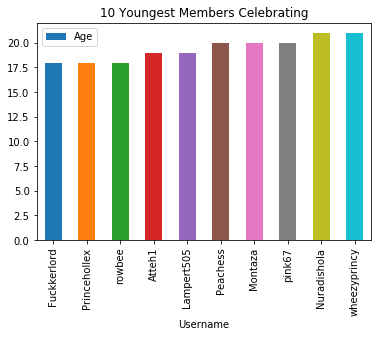

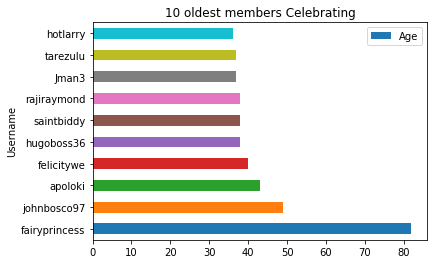

In [2]:
todays_date = datetime.now().date()
csv_name = todays_date.strftime("%Y%m%d")  
filename = csv_name + '.csv'
data = pd.read_csv(filename)
# i just used the code above to read data from the saved file rather than geting from net for forther manipulation

age_statistic = data.Age.describe() #shows values such as max, median, sum etc 

age_old = data.sort_values(by="Age", ascending=False)[:10] #gets the oldest age downwards

age_young = data.sort_values(by="Age", ascending=True)[:10] #gets the first 10 youngest people

# to answer, How old will each celebrant be in 10years?
data["Age_10_Plus"] = data["Age"] + 10


# age at 2005 when NairaLand was established# age at 
data["Age_at_2005"] = data["Age"] - 11

%matplotlib inline
age_young.plot(x="Username", y="Age", kind="bar", title="10 Youngest Members Celebrating")
age_old.plot(x="Username", y="Age", kind="barh", title="10 oldest members Celebrating")

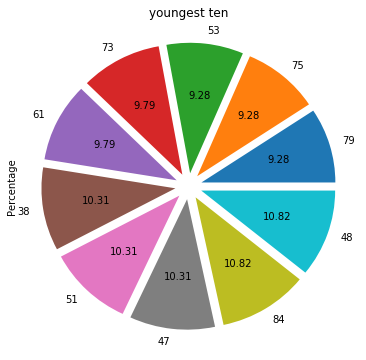

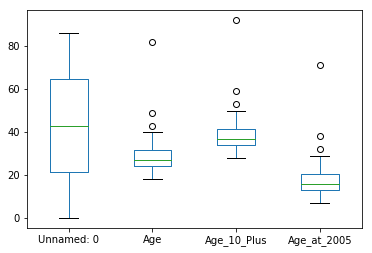

In [3]:
sum_age_young = age_young['Age'].sum()


age_young["Percentage"] = (age_young["Age"] * 100) / (sum_age_young)
explode = ( 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 ) #en explode to add the burst like nature of the piechart
age_young["Percentage"].plot.pie(autopct='%.2f', explode=explode, fontsize=10, figsize=(6, 6), title="youngest ten")
data.plot.box()

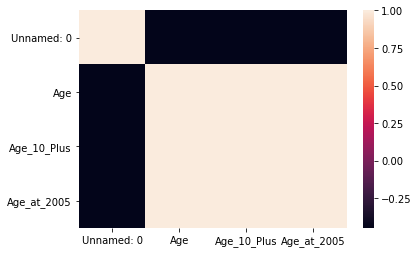

In [9]:
# ---------------- this are my added stuff to the project as requested by my instructor at favcode -------------------------

data.head(5)
import seaborn as sns
%matplotlib inline

cor_matrix = data.corr( )
sns.heatmap(cor_matrix)
# the plot below shows that the variable Age_10_Plus, Age_at_2005 and Age are strongly correlated
# therefor and increase in one leads to an increase in the other